# Importing Libraries

In [24]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Importing the Dataset

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head() #retrieving the first 5 records.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA/ Feature Engineering steps:

In [3]:
df.shape #Checking the shape of the data

(400, 11)

In [4]:
df.isnull().any() #checking for any missing values in the data

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df_num=[]
df_cat=[]
for i in df.columns:
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        df_num.append(i)
    else:
        df_cat.append(i)
print(df_num)
print(df_cat)

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
['ShelveLoc', 'Urban', 'US']


### In the above block of code I am seaparating the categorical features and numerical features using for loop

In [6]:
for i in df_cat:
    print('Unique label in {} is: {}'.format(i,df[i].unique())) #obtaining the unique labels in the categorical feature.

Unique label in ShelveLoc is: ['Bad' 'Good' 'Medium']
Unique label in Urban is: ['Yes' 'No']
Unique label in US is: ['Yes' 'No']


### unique() function gives the unique labels in the categorical feature.

In [7]:
df['Urban']=np.where(df['Urban']=='Yes',1,0) #Converting the categorical feature values into 1's and 0's using the 
#np.where function.
df['US']=np.where(df['US']=='Yes',1,0)

### using np.where converting all the labels with yes as 1 in the categorical feature US and Urban to 1 and rest to 0.

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [9]:
map_={'Bad':0, 'Medium':1 ,'Good':2}

In [10]:
df['ShelveLoc']=df['ShelveLoc'].map(map_)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


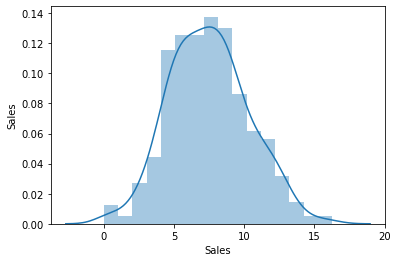

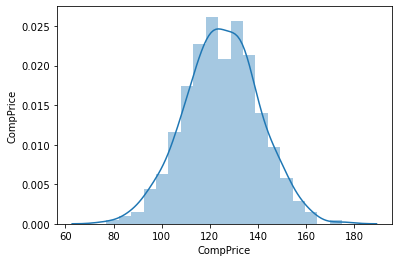

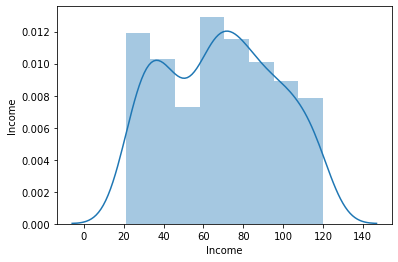

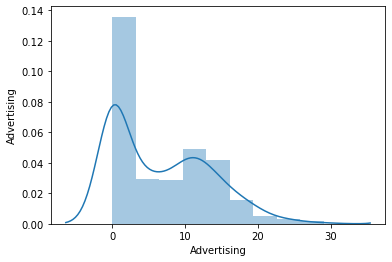

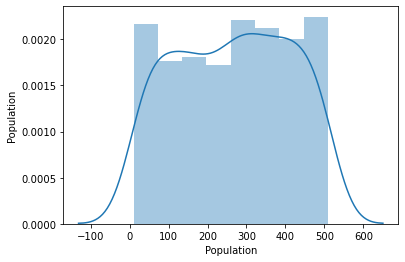

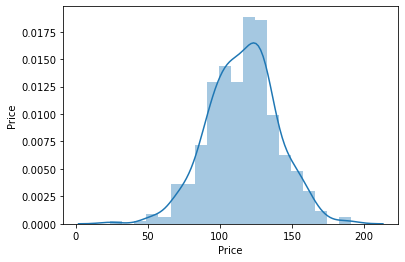

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


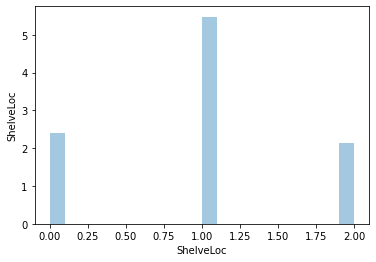

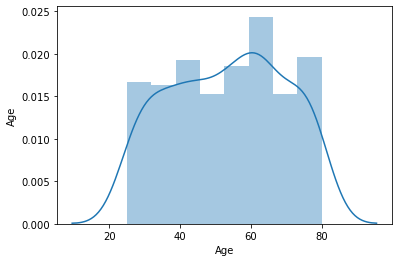

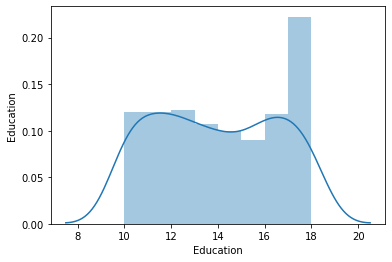

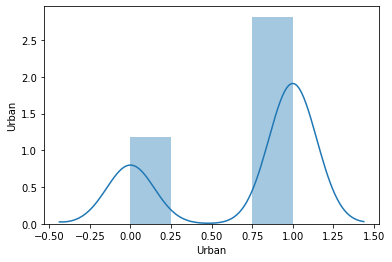

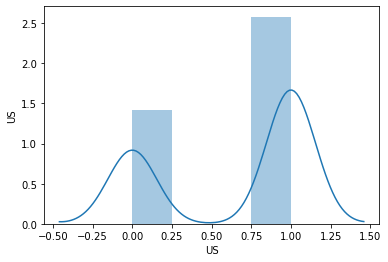

In [11]:
for i in df.columns:
    sns.distplot(df[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.show()

In [16]:
print(df['Sales'].min())
print(df['Sales'].max())

0.0
16.27


### obtaining the maximum and minimum value from the sales category to convert into a categorical feature.

In [38]:
clean_data=df.copy()
clean_data['Sales']=(clean_data['Sales']>8.1)*1 #if the Taxable income is greater then 8.1 populate it
#with 1 else it is 0.
clean_data[['Sales']].head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [18]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [21]:
X=df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']] #Independent feature.
y=clean_data['Sales'] #dependent feature

# Model Training:

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #Splitting the train and the test set.

In [25]:
clf=DecisionTreeClassifier(random_state=0) #obtaining the instance of the Decision tree classifier
clf.fit(X_train,y_train) #Fitting the instance on the train and the test dataset.

DecisionTreeClassifier(random_state=0)

In [26]:
pred=clf.predict(X_test) #predicting the test dataset using clf.predict.
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.77


### We can see that the accuracy of the test set is low compared to the train accuracy causing overfitting of the train set. This is because the decision tree is created to its maximum depth causing the model to overfit the data.Thus the training accuracy is too high and the test accuracy is low. To counter this situation we prune the model

[Text(498.1796875, 522.6923076923077, 'X[5] <= 1.5\ngini = 0.473\nsamples = 300\nvalue = [185, 115]'),
 Text(275.609375, 480.8769230769231, 'X[4] <= 92.5\ngini = 0.418\nsamples = 239\nvalue = [168, 71]'),
 Text(100.75, 439.0615384615385, 'X[6] <= 65.0\ngini = 0.444\nsamples = 33\nvalue = [11, 22]'),
 Text(62.0, 397.2461538461539, 'X[1] <= 56.0\ngini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(31.0, 355.4307692307692, 'X[6] <= 45.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(15.5, 313.61538461538464, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(46.5, 313.61538461538464, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(93.0, 355.4307692307692, 'X[7] <= 15.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(77.5, 313.61538461538464, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(108.5, 313.61538461538464, 'X[3] <= 207.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(93.0, 271.8, 'X[0] <= 88.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(77.5, 229.9846

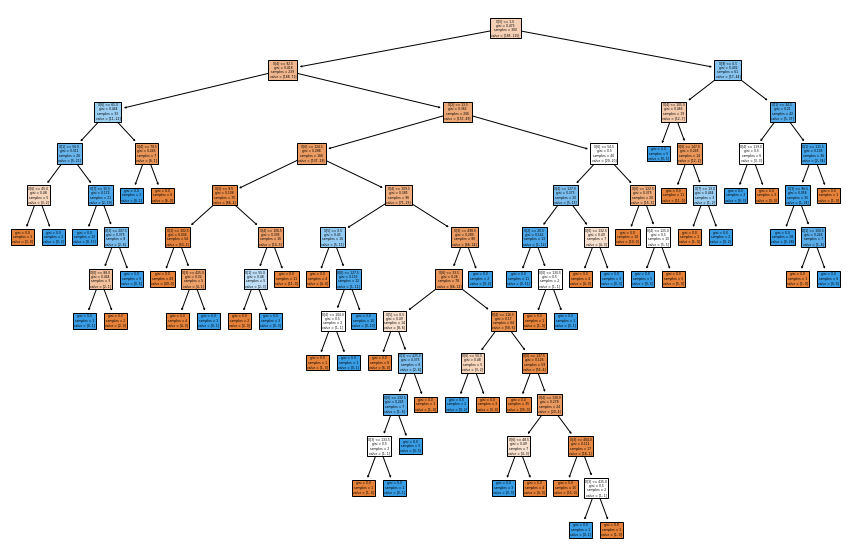

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True) #visualising the tree using plot_tree function from the module tree.

### As we can see from the above analysis that there are a lot of nodes in the tree and we must perform pruning to avoid overfitting.

In [28]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #cost_complexity_pruning_path will give ccp_alphas and impurities
#in which ccp_alphas is a hyperparameter.
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

In [29]:
ccp_alphas #hypertuning parameter

array([0.        , 0.00285714, 0.00305556, 0.00307692, 0.00313725,
       0.0032381 , 0.0032716 , 0.00402116, 0.00428571, 0.00444444,
       0.00571429, 0.0059951 , 0.0061164 , 0.00619988, 0.00698413,
       0.00742979, 0.00838624, 0.00942308, 0.01025   , 0.0125    ,
       0.01625153, 0.01666667, 0.01680556, 0.01724935, 0.01804511,
       0.0227395 , 0.02290987, 0.03486638, 0.05830948])

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05830947862602981


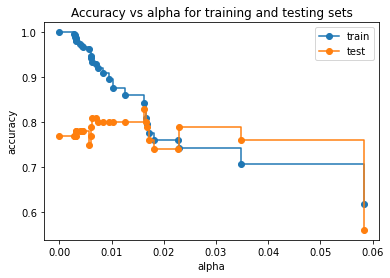

In [33]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] #list comprehension of train score
test_scores = [clf.score(X_test, y_test) for clf in clfs] #list comprehension of test score

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Plotting the train and test score w.r.t alpha, we choose that value of alpha where the train and test score doesn't vary much, a generalised model with low variance and low bias. From the above plot we see that we obtain a generalised model with alpha =0.015

In [34]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015) #training the model with ccp_alpha=0.015
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=0)

In [36]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(clf.score(X_train,y_train)) #accuracy of the train data
print(accuracy_score(y_test, pred)) ##accuracy of the test data

0.86
0.8


### Now we have obtained the generalised model

# Visualising the new decision tree

[Text(325.5, 504.7714285714286, 'X[5] <= 1.5\ngini = 0.473\nsamples = 300\nvalue = [185, 115]'),
 Text(167.4, 427.11428571428576, 'X[4] <= 92.5\ngini = 0.418\nsamples = 239\nvalue = [168, 71]'),
 Text(74.4, 349.4571428571429, 'X[6] <= 65.0\ngini = 0.444\nsamples = 33\nvalue = [11, 22]'),
 Text(37.2, 271.8, 'gini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(111.60000000000001, 271.8, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(260.40000000000003, 349.4571428571429, 'X[2] <= 13.5\ngini = 0.363\nsamples = 206\nvalue = [157, 49]'),
 Text(186.0, 271.8, 'X[0] <= 124.5\ngini = 0.288\nsamples = 166\nvalue = [137, 29]'),
 Text(148.8, 194.14285714285717, 'gini = 0.108\nsamples = 70\nvalue = [66, 4]'),
 Text(223.20000000000002, 194.14285714285717, 'X[4] <= 109.5\ngini = 0.385\nsamples = 96\nvalue = [71, 25]'),
 Text(186.0, 116.48571428571432, 'X[5] <= 0.5\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(148.8, 38.82857142857142, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(223

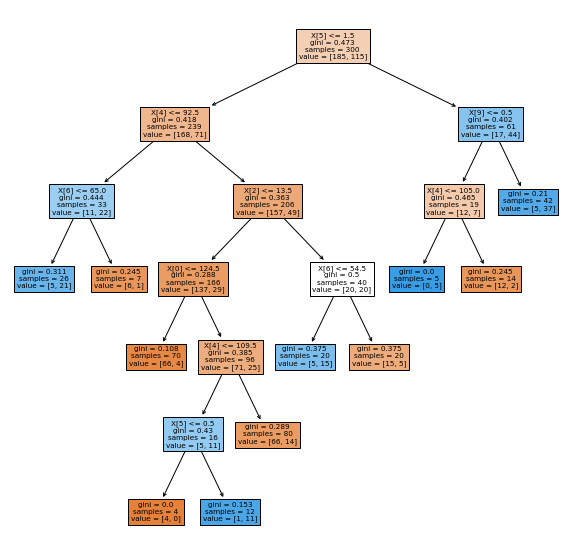

In [37]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)